# part 1

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# creating data

In [2]:
train_labels=[]
train_sample = []

In [3]:
for i in range(50):
    # 5% younger did expreince side effect
    random_younger = randint(13,64)
    train_sample.append(random_younger)
    train_labels.append(1)
    
    # 5% older did not exprience side effect
    random_older = randint(65,100)
    train_sample.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # 95% younger did not exprience side effect
    random_youngern= randint(13,64)
    train_sample.append(random_younger)
    train_labels.append(0)
    
    
    
    # 95% older did exprience side effect
    random_older=randint(65,100)
    train_sample.append(random_older)
    train_labels.append(1)

# test set creation

In [14]:
test_labels=[]
test_sample = []

In [15]:
for i in range(10):
    # 5% younger did expreince side effect
    random_younger = randint(13,64)
    test_sample.append(random_younger)
    test_labels.append(1)
    
    # 5% older did not exprience side effect
    random_older = randint(65,100)
    test_sample.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # 95% younger did not exprience side effect
    random_youngern= randint(13,64)
    test_sample.append(random_younger)
    test_labels.append(0)
    
    
    
    # 95% older did exprience side effect
    random_older=randint(65,100)
    test_sample.append(random_older)
    test_labels.append(1)

# data preprocessing

In [17]:
# for training dataset
train_labels= np.array(train_labels)
train_sample=np.array(train_sample)
train_labels,train_sample=shuffle(train_labels,train_sample)

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_smaples=scaler.fit_transform(train_sample.reshape(-1,1))

In [19]:
# for test dataset
test_labels= np.array(test_labels)
test_sample=np.array(test_sample)
test_labels,test_sample=shuffle(test_labels,test_sample)


scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_smaples=scaler.fit_transform(test_sample.reshape(-1,1))

# simple tf.keras sequential model

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [7]:
# for gpu user
#physical_devices = tf.config.experimental.list_physical_devices("GPU")
#print("Numm GPUs Available: ",len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [8]:
model = Sequential([
    Dense(units=16,input_shape = (1,),activation="relu"),
    Dense(units=32,activation="relu"),
    Dense(units=2,activation="softmax")
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x=scaled_train_smaples,y=train_labels,batch_size = 10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.6457 - accuracy: 0.5690
Epoch 2/30
210/210 - 1s - loss: 0.5947 - accuracy: 0.9738
Epoch 3/30
210/210 - 1s - loss: 0.5424 - accuracy: 0.9714
Epoch 4/30
210/210 - 1s - loss: 0.4905 - accuracy: 0.9700
Epoch 5/30
210/210 - 1s - loss: 0.4396 - accuracy: 0.9700
Epoch 6/30
210/210 - 1s - loss: 0.3935 - accuracy: 0.9700
Epoch 7/30
210/210 - 1s - loss: 0.3519 - accuracy: 0.9695
Epoch 8/30
210/210 - 1s - loss: 0.3165 - accuracy: 0.9695
Epoch 9/30
210/210 - 1s - loss: 0.2865 - accuracy: 0.9695
Epoch 10/30
210/210 - 1s - loss: 0.2590 - accuracy: 0.9690
Epoch 11/30
210/210 - 1s - loss: 0.2353 - accuracy: 0.9686
Epoch 12/30
210/210 - 1s - loss: 0.2165 - accuracy: 0.9681
Epoch 13/30
210/210 - 1s - loss: 0.2016 - accuracy: 0.9676
Epoch 14/30
210/210 - 1s - loss: 0.1898 - accuracy: 0.9671
Epoch 15/30
210/210 - 1s - loss: 0.1804 - accuracy: 0.9662
Epoch 16/30
210/210 - 1s - loss: 0.1729 - accuracy: 0.9657
Epoch 17/30
210/210 - 1s - loss: 0.1670 - accuracy: 0.9652
Epoch 

In [12]:
# with validation set
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(x=scaled_train_smaples,y=train_labels,validation_split=0.1,batch_size = 10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.1403 - accuracy: 0.9661 - val_loss: 0.1526 - val_accuracy: 0.9524
Epoch 2/30
189/189 - 1s - loss: 0.1398 - accuracy: 0.9661 - val_loss: 0.1519 - val_accuracy: 0.9524
Epoch 3/30
189/189 - 1s - loss: 0.1394 - accuracy: 0.9667 - val_loss: 0.1512 - val_accuracy: 0.9524
Epoch 4/30
189/189 - 1s - loss: 0.1389 - accuracy: 0.9667 - val_loss: 0.1506 - val_accuracy: 0.9524
Epoch 5/30
189/189 - 1s - loss: 0.1386 - accuracy: 0.9667 - val_loss: 0.1502 - val_accuracy: 0.9524
Epoch 6/30
189/189 - 1s - loss: 0.1382 - accuracy: 0.9667 - val_loss: 0.1496 - val_accuracy: 0.9524
Epoch 7/30
189/189 - 1s - loss: 0.1379 - accuracy: 0.9667 - val_loss: 0.1491 - val_accuracy: 0.9524
Epoch 8/30
189/189 - 1s - loss: 0.1376 - accuracy: 0.9672 - val_loss: 0.1485 - val_accuracy: 0.9524
Epoch 9/30
189/189 - 1s - loss: 0.1374 - accuracy: 0.9677 - val_loss: 0.1481 - val_accuracy: 0.9524
Epoch 10/30
189/189 - 1s - loss: 0.1372 - accuracy: 0.9677 - val_loss: 0.1476 - val_accuracy: 0.9524

# prediction

In [20]:
prediction=model.predict(x=scaled_test_smaples,batch_size=10,verbose=0)

In [22]:
for i in prediction:
    print(i)

[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.01838714 0.9816128 ]
[0.01728104 0.98271894]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.29269972 0.70730025]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.07414611 0.92585385]
[0.06214161 0.9378584 ]
[0.10473652 0.8952635 ]
[0.06592648 0.9340735 ]
[0.01434059 0.98565936]
[0.2926997  0.70730025]
[0.04608779 0.95391226]
[0.03011366 0.96988636]
[0.01434059 0.98565936]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.10473652 0.8952635 ]
[0.05197159 0.94802845]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.25505865 0.74494135]
[0.03011366 0.96988636]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.2926997  0.70730025]
[0.01838714 0.9816128 ]
[0.0699247  0.93007535]
[0.04608779 0.95391226]
[0.02081169 0.97918826]
[0.2926997  0.70730025]
[0.05197159 0.94

In [23]:
rounded_prediction= np.argmax(prediction,axis=-1)

In [ ]:
for i in rounded_prediction:
    print(i)

# accuracy calculation
confusion metrix

In [28]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [29]:
cm=confusion_matrix(test_labels,rounded_prediction)

In [31]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

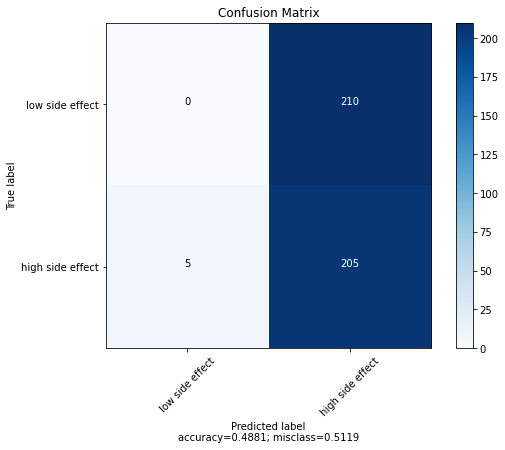

In [33]:
plot_confusion_matrix(cm,
                      normalize    = False,
                      target_names = ["low side effect","high side effect"],
                      title        = "Confusion Matrix")

# save model

In [35]:
import os 
if os.path.isfile('models/medical_model.h5') is False:
    model.save('models/medical_model.h5')

# importing model

In [36]:
from tensorflow.keras.models import load_model
new_model = load_model("models/medical_model.h5")

In [37]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [38]:
new_model.get_weights()

[array([[-0.11651182,  0.747669  , -0.24289295,  0.4756933 , -0.5940292 ,
         -0.16284099, -0.25922054,  0.754171  ,  0.7903186 , -0.46115255,
         -0.06205863,  0.44311443, -0.4960552 , -0.46605587, -0.5069568 ,
          0.64691436]], dtype=float32),
 array([ 0.        , -0.0437239 ,  0.        , -0.02790599,  0.        ,
         0.        ,  0.        , -0.04450646, -0.04664285,  0.        ,
         0.        , -0.02600292,  0.        ,  0.        ,  0.        ,
         0.16952392], dtype=float32),
 array([[ 0.04705846, -0.08406508, -0.32894906,  0.18106511, -0.2296386 ,
          0.16111687, -0.2931818 , -0.03715557,  0.24675068,  0.03384131,
          0.34274283,  0.06409338, -0.07090878, -0.2987817 ,  0.27729407,
          0.01249915,  0.16334787,  0.16045597, -0.03763586, -0.1805689 ,
          0.07286078, -0.00557467, -0.34912932, -0.34257016, -0.14255472,
          0.34708562, -0.03122619, -0.09492457, -0.2908704 ,  0.09773609,
          0.3196335 , -0.3234484 ],
 

In [39]:
new_model.optimizer

In [40]:
# model to json

In [41]:
json_string = model.to_json()

In [44]:
# save as YAML

In [45]:
yaml_string = model.to_yaml()

In [ ]:
from tensorflow.keras.models import model_from_json
model_from_json

# save model weight

In [47]:
if os.path.isfile('models/model_Weight.h5') is False:
    model.save_weights('models/model_Weight.h5')

In [49]:
model2 = Sequential([
    Dense(units=16,input_shape = (1,),activation="relu"),
    Dense(units=32,activation="relu"),
    Dense(units=2,activation="softmax")
])

In [50]:
model2.load_weights('models/model_Weight.h5')

In [51]:
model2.get_weights()

[array([[-0.11651182,  0.747669  , -0.24289295,  0.4756933 , -0.5940292 ,
         -0.16284099, -0.25922054,  0.754171  ,  0.7903186 , -0.46115255,
         -0.06205863,  0.44311443, -0.4960552 , -0.46605587, -0.5069568 ,
          0.64691436]], dtype=float32),
 array([ 0.        , -0.0437239 ,  0.        , -0.02790599,  0.        ,
         0.        ,  0.        , -0.04450646, -0.04664285,  0.        ,
         0.        , -0.02600292,  0.        ,  0.        ,  0.        ,
         0.16952392], dtype=float32),
 array([[ 0.04705846, -0.08406508, -0.32894906,  0.18106511, -0.2296386 ,
          0.16111687, -0.2931818 , -0.03715557,  0.24675068,  0.03384131,
          0.34274283,  0.06409338, -0.07090878, -0.2987817 ,  0.27729407,
          0.01249915,  0.16334787,  0.16045597, -0.03763586, -0.1805689 ,
          0.07286078, -0.00557467, -0.34912932, -0.34257016, -0.14255472,
          0.34708562, -0.03122619, -0.09492457, -0.2908704 ,  0.09773609,
          0.3196335 , -0.3234484 ],
 